In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('appl_1980_2014.csv')

In [3]:
df.shape

(8465, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

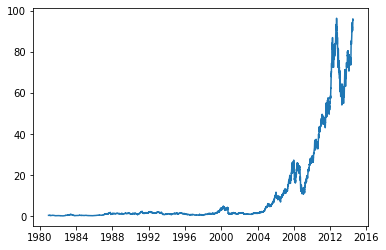

In [6]:
plt.plot(df['Date'], df['Adj Close'])
plt.show()

In [7]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

In [8]:
y = y.reshape(-1,1)

In [31]:
x_sc = StandardScaler()
X = x_sc.fit_transform(X)

y_sc = StandardScaler()
y = y_sc.fit_transform(y)

In [32]:
X.shape

(8465, 4)

In [33]:
n = len(X)

In [34]:
X[:5]

array([[-0.01637063, -0.02129753, -0.02352917, -0.0225504 ],
       [-0.03137518, -0.02695604, -0.0222484 , -0.01818016],
       [-0.03468604, -0.04015924, -0.02865227, -0.03185476],
       [-0.03327717, -0.04043867, -0.02943496, -0.03573158],
       [-0.0357427 , -0.04036881, -0.02915035, -0.03544963]])

In [35]:
# x = [x0, x1, x2, x3, x4]

In [36]:
x0 = np.ones(n)

In [37]:
# X = np.c_[x0, X]

In [38]:
# X[:5]

In [39]:
# X.shape

In [40]:
newX = []
newX.append(x0)

for i in range(X.shape[1]):
    newX.append(X[:,i])

In [41]:
newX = np.array(newX)

In [42]:
newX.shape

(5, 8465)

In [43]:
newX = newX.T

In [44]:
newX.shape

(8465, 5)

In [45]:
theta = np.zeros(5)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(newX,y,test_size=0.25)

In [47]:
x_train.shape

(6348, 5)

In [48]:
x_test.shape

(2117, 5)

In [49]:
def cost_function(x,y,theta):
    n = len(x)
    error = (sum((np.dot(x,theta) - y) ** 2)) / n
    return error

In [50]:
cost_function(x_train, y_train.flatten(), theta)

0.9768634225945061

In [51]:
def gradient_descent(x, y, theta, epochs, alpha):
    n = len(x)
    cost_history = [0] * epochs
    for i in range(epochs):
        pred = np.dot(x,theta)
        error = pred - y
        grad_slope = (2/n) * error.T.dot(x)
        theta = theta - grad_slope * alpha
        cost_history[i] = cost_function(x,y,theta)
        #print(cost_history[i], slope, inter)
    return theta, cost_history

In [52]:
epochs = 50
alpha = 0.01
theta = np.zeros(5)
theta, error = gradient_descent(x_train,y_train.flatten(),theta,epochs,alpha)

In [53]:
theta

array([-0.00114844,  0.23977946,  0.23973707,  0.23994353,  0.23997543])

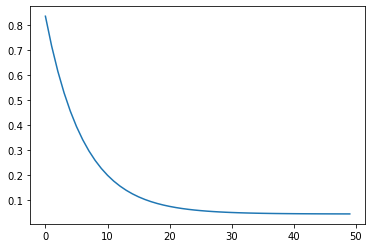

In [54]:
plt.plot(error)

In [55]:
y_pred = np.dot(x_test, theta)

In [56]:
mean_squared_error(y_test, y_pred)

0.060750472289773844

In [58]:
x_test_1 = np.array([1, 96.27,96.80,93.92,95.35])

In [59]:
np.dot(x_test_1, theta)

91.70612208913562

In [60]:
import pickle as pkl

In [61]:
# Data Serialization / Save Object State
file = open('weights.pkl', 'wb')
pkl.dump(theta, file)
file.close()